# EDA AND PREPROCESING

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
#import data
data = pd.read_csv('F:\Programing app\Technocolabs\Datasets/loan_level_500k.csv')

In [8]:
#first 5 rows of the dataset
data.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False


In [10]:
#number of rows and columns of dataset
data.shape

(500137, 27)

There are total 500137 rows and 27 columns in the dataset.

In [15]:
data.dtypes

CREDIT_SCORE                        float64
FIRST_PAYMENT_DATE                    int64
FIRST_TIME_HOMEBUYER_FLAG            object
MATURITY_DATE                         int64
METROPOLITAN_STATISTICAL_AREA       float64
MORTGAGE_INSURANCE_PERCENTAGE       float64
NUMBER_OF_UNITS                     float64
OCCUPANCY_STATUS                     object
ORIGINAL_COMBINED_LOAN_TO_VALUE     float64
ORIGINAL_DEBT_TO_INCOME_RATIO       float64
ORIGINAL_UPB                          int64
ORIGINAL_LOAN_TO_VALUE              float64
ORIGINAL_INTEREST_RATE              float64
CHANNEL                              object
PREPAYMENT_PENALTY_MORTGAGE_FLAG     object
PRODUCT_TYPE                         object
PROPERTY_STATE                       object
PROPERTY_TYPE                        object
POSTAL_CODE                         float64
LOAN_SEQUENCE_NUMBER                 object
LOAN_PURPOSE                         object
ORIGINAL_LOAN_TERM                    int64
NUMBER_OF_BORROWERS             

In [16]:
data.dtypes.value_counts()

object     11
float64    10
int64       4
bool        2
dtype: int64

#### Remove unnecessary columns from the dataset

1. 'FIRST_PAYMENT_DATE',

2. 'MATURITY_DATE',

3. 'LOAN_SEQUENCE_NUMBER'

4. 'METROPOLITAN_STATISTICAL_AREA'

5.  'OCCUPANCY_STATUS',

6. 'CHANNEL',

7. 'PRODUCT_TYPE',

8. 'PROPERTY_STATE',

9. 'PROPERTY_TYPE',

10. 'NUMBER_OF_BORROWERS',

11. 'LOAN_PURPOSE',

12. 'PREPAYMENT_PENALTY_MORTGAGE_FLAG',

13. 'SELLER_NAME',

14. 'SERVICER_NAME',

15. 'POSTAL_CODE'

In [21]:
unnecessary_cols = ['FIRST_PAYMENT_DATE', 'MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA', 'OCCUPANCY_STATUS', 'CHANNEL','PRODUCT_TYPE', 'LOAN_SEQUENCE_NUMBER', 'SELLER_NAME', 'POSTAL_CODE', 'SERVICER_NAME', 'PROPERTY_STATE', 'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'PROPERTY_TYPE', 'LOAN_PURPOSE', 'NUMBER_OF_BORROWERS']

In [23]:
#create df by removing unnecessary columns
df = data.drop(unnecessary_cols, axis=1)
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,DELINQUENT
0,669.0,N,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,False
1,732.0,N,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,False
2,679.0,N,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,False
3,721.0,N,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,False
4,618.0,N,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CREDIT_SCORE                     497426 non-null  float64
 1   FIRST_TIME_HOMEBUYER_FLAG        369578 non-null  object 
 2   MORTGAGE_INSURANCE_PERCENTAGE    449089 non-null  float64
 3   NUMBER_OF_UNITS                  500134 non-null  float64
 4   ORIGINAL_COMBINED_LOAN_TO_VALUE  500124 non-null  float64
 5   ORIGINAL_DEBT_TO_INCOME_RATIO    485208 non-null  float64
 6   ORIGINAL_UPB                     500137 non-null  int64  
 7   ORIGINAL_LOAN_TO_VALUE           500128 non-null  float64
 8   ORIGINAL_INTEREST_RATE           500137 non-null  float64
 9   ORIGINAL_LOAN_TERM               500137 non-null  int64  
 10  PREPAID                          500137 non-null  bool   
 11  DELINQUENT                       500137 non-null  bool   
dtypes:

After removing 15 unnecessary columns, 12 columns lefts.

Keep this columns for further steps.

In [26]:
df.columns

Index(['CREDIT_SCORE', 'FIRST_TIME_HOMEBUYER_FLAG',
       'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_UNITS',
       'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       'ORIGINAL_UPB', 'ORIGINAL_LOAN_TO_VALUE', 'ORIGINAL_INTEREST_RATE',
       'ORIGINAL_LOAN_TERM', 'PREPAID', 'DELINQUENT'],
      dtype='object')

Remaining columns are:

1. 'CREDIT_SCORE',

2. 'FIRST_TIME_HOMEBUYER_FLAG',

3. 'MORTGAGE_INSURANCE_PERCENTAGE', 

4. 'NUMBER_OF_UNITS

5. 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 
6. 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       
7. 'ORIGINAL_UPB', 

8. 'ORIGINAL_LOAN_TO_VALUE', 

9. 'ORIGINAL_INTEREST_RATE',
       
10. 'ORIGINAL_LOAN_TERM', 

11. 'PREPAID', 

12. 'DELINQUENT'

## EDA

In this phase I will analyze the data to find out:

* Missing Values

* All the Numerical Varibles

* Distribution of the Numerical Variables

* Categorical varibles

* Outliers

* Relationship between Independent and dependent feature

In [28]:
# find number of missing values for each column in the dataset
df.isnull().sum()

CREDIT_SCORE                         2711
FIRST_TIME_HOMEBUYER_FLAG          130559
MORTGAGE_INSURANCE_PERCENTAGE       51048
NUMBER_OF_UNITS                         3
ORIGINAL_COMBINED_LOAN_TO_VALUE        13
ORIGINAL_DEBT_TO_INCOME_RATIO       14929
ORIGINAL_UPB                            0
ORIGINAL_LOAN_TO_VALUE                  9
ORIGINAL_INTEREST_RATE                  0
ORIGINAL_LOAN_TERM                      0
PREPAID                                 0
DELINQUENT                              0
dtype: int64

**Analysis**

from the above observation we can find the following columns has null values:

* CREDIT_SCORE  -  2711

* FIRST_TIME_HOMEBUYER_FLAG   -   130559

* MORTGAGE_INSURANCE_PERCENTAGE    -   51048

* NUMBER_OF_UNITS  -  3

* ORIGINAL_COMBINED_LOAN_TO_VALUE    -    13

* ORIGINAL_DEBT_TO_INCOME_RATIO   -    14929

* ORIGINAL_LOAN_TO_VALUE   - 9


In [41]:
#find out number of missing values percentage in the overall dataset

total_num_records = np.product(df.shape)
#6001644

total_num_missing_values = sum(df.apply(lambda x: sum(x.isnull().values), axis=1)>0)
#170570

missing_percentage = (total_num_missing_values/total_num_records)*100

print('Percentage of missing records in the dataset is', missing_percentage)


Percentage of missing records in the dataset is 2.842054610370092


**Analysis**

There is apprx 3% of null values in the dataset.

### Let's observe the feature datatypes and distribution of the data with some simple analysis technique and visulization.


In [42]:
df.dtypes.value_counts()

float64    7
bool       2
int64      2
object     1
dtype: int64

In [54]:
#list of numerical variables
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical feature :', len(numerical_feature))
numerical_feature

Number of numerical feature : 11


['CREDIT_SCORE',
 'MORTGAGE_INSURANCE_PERCENTAGE',
 'NUMBER_OF_UNITS',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'ORIGINAL_UPB',
 'ORIGINAL_LOAN_TO_VALUE',
 'ORIGINAL_INTEREST_RATE',
 'ORIGINAL_LOAN_TERM',
 'PREPAID',
 'DELINQUENT']

In [55]:
#list of categorical variable
categorical_feature =  [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical feature:', len(categorical_feature))
categorical_feature

Number of categorical feature: 1


['FIRST_TIME_HOMEBUYER_FLAG']

**Continuous and discrete variables**

In [57]:
#list of continuous variables
continuous_feature = [feature for feature in numerical_feature if len(df[feature].unique())>25]

print('Number of continuous feature:', len(continuous_feature))
continuous_feature

Number of continuous feature: 8


['CREDIT_SCORE',
 'MORTGAGE_INSURANCE_PERCENTAGE',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'ORIGINAL_UPB',
 'ORIGINAL_LOAN_TO_VALUE',
 'ORIGINAL_INTEREST_RATE',
 'ORIGINAL_LOAN_TERM']

In [59]:
#list of discrete feature
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]

print('Number of continuous feature:', len(discrete_feature))
discrete_feature

Number of continuous feature: 3


['NUMBER_OF_UNITS', 'PREPAID', 'DELINQUENT']

**Univariate Analysis**

**Obsrving the distrubution of numerical - continuous feature**

In [62]:
def plot_continuous_feature(cont_feature):
    for feature in cont_feature:
        
        sns.distplot(df[feature], kde=True)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature.title() + " " + "Distribution")
        plt.show()

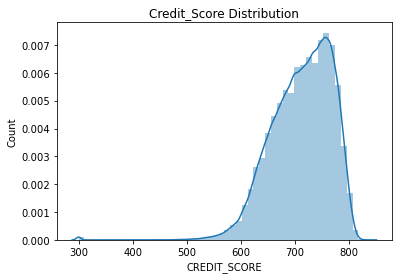

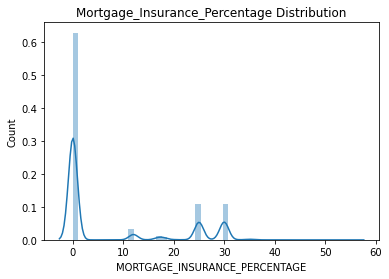

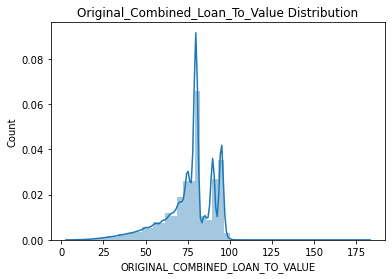

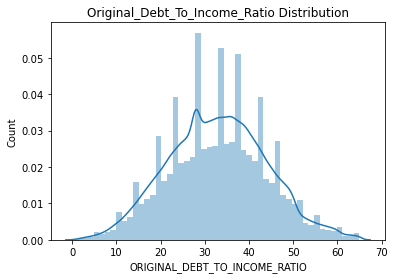

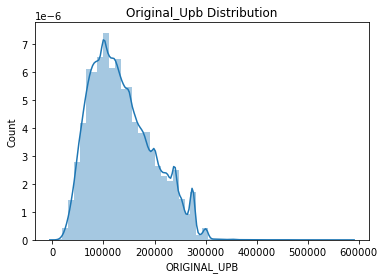

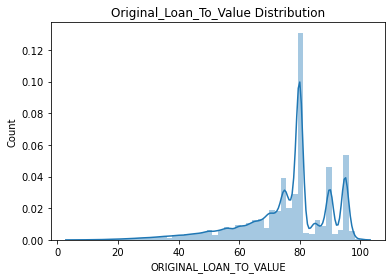

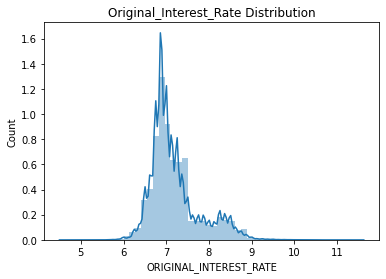

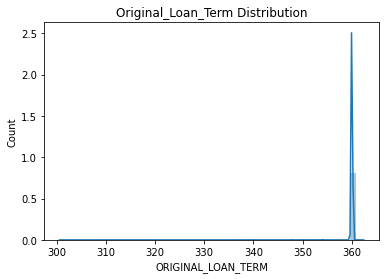

In [63]:
plot_continuous_feature(continuous_feature)

### Analysis**
* **Credit_Score** - Most of the Credit score lies between 650 to 850.
* **MORTGAGE_INSURANCE_PERCENTAGE** - The percentage distribution doesn't exceed from more than 30-35%, most of the MIP are 0%.

* **ORIGINAL_COMBINED_LOAN_TO_VALUE** - In this feature the combined loan to value of the borrowers is mainly distributed between 25% to 100% most of the borrowers have CLTV around 75%.

* **ORIGINAL_DEBT_TO_INCOME_RATIO** - The values in this feature are very well distributed and thus follows the normal distribution the ratio value ranges from 0 to 70.

* **ORIGINAL_UPB** - This values in this features are mostly right skewed. This feature is actually UPB of the mortgage on the note date. Most of the value lies in between 0 to 300000.

* **ORIGINAL_LOAN_TO_VALUE** - This feature also doesn't follow a normal distribution. The value range form 0 t0 100% and most of the borrowers has around 80 to 85% of LTV.

* **ORIGINAL_INTEREST_RATE** - This feature somewhat follows gaussian distribution and the Interest rate mostly lies in between 6-9%.

* **ORIGINAL_LOAN_TERM** - This feature is obtained by subtracting the Maturity Date from the first payment date.

                  i.e. Original_loan_term = (Loan Maturity Date (MM/YY) – Loan First Payment Date (MM/YY) + 1. 

The dataset only contains the loan tern in between 300 to 420 and rest of the loan terms are all excluded from the dataset.

### Observing the distrubution of numerical-discrete feature**

In [67]:
def feature_countplot(features):
  for feature in features:
    plt.figure(figsize = (7,6))
    sns.countplot(x = feature, data = df)
    plt.xlabel(feature)  
    plt.ylabel("count")
    plt.title(feature.title() + " " + "Count distribution")
    plt.show()

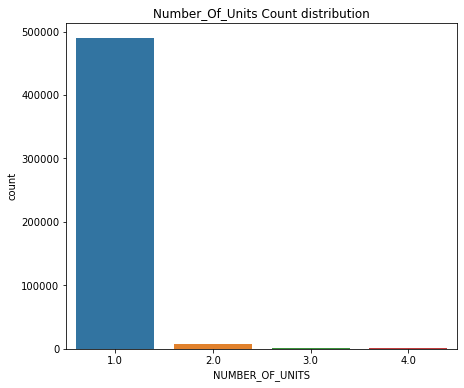

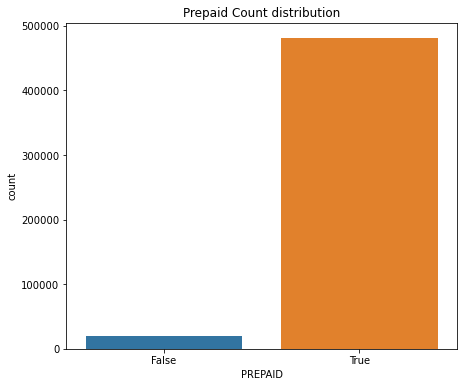

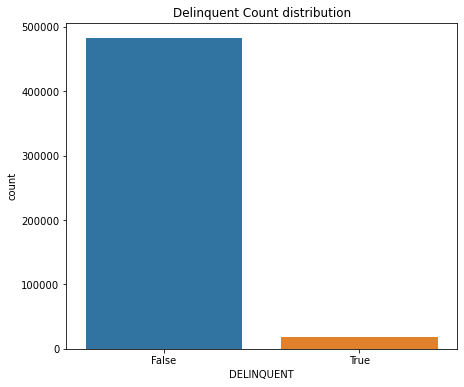

In [68]:
feature_countplot(discrete_feature)

**Analysis**
* **NUMBER_OF_UNITS** - The values are like (1 = one unit, 2= two units, 3= three units, 4 = four units). Where most of the borrowers borrowed for one unit.
* **DELINQUENT** - Most of the borrowers hasn't reported any DELINQUENCY.
* **Prepaid** -  It is a target variable. Most of the borrowers reported prepaid borrowers.

### observing distrubution of categorical feature
**using same function (feature_countplot)**

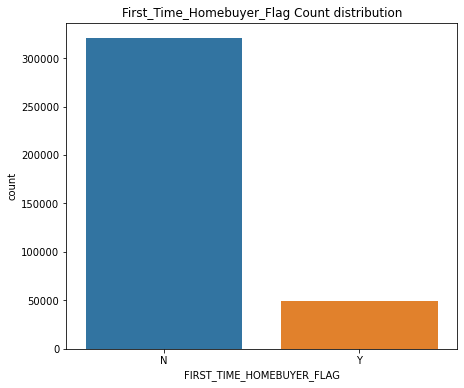

In [69]:
feature_countplot(categorical_feature)

**Analysis**
* Most of the borrowers are not a first time homebuyers.

### Observing the target variable (prepaid)

In [73]:
df['PREPAID'].value_counts()

True     480724
False     19413
Name: PREPAID, dtype: int64

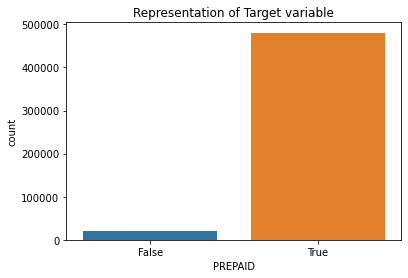

In [72]:
plt.title("Representation of Target variable")
sns.countplot(x ='PREPAID',data = df)
plt.show()

In [76]:
#find the percentage of True and False.
prepaid_count = 480724
non_prepaid_count = 19413
Total_count = prepaid + not_prepaid

prepaid_percent = (prepaid_count/Total_count)*100
print("The prepaid percentage is :\n",prepaid_percent)
print("The non-prepaid percentage is :\n",100-prepaid_percent)

The prepaid percentage is :
 96.11846354098978
The non-prepaid percentage is :
 3.8815364590102206


**Analysis**
* From the above observation, it is clear that risk of prepayment is very high for the investors.
* 96% of borrowers prepaid their loan before the loan_term_ends. Only remaining 4%, not prepaid their loan.

## Lets check the correlation between variables

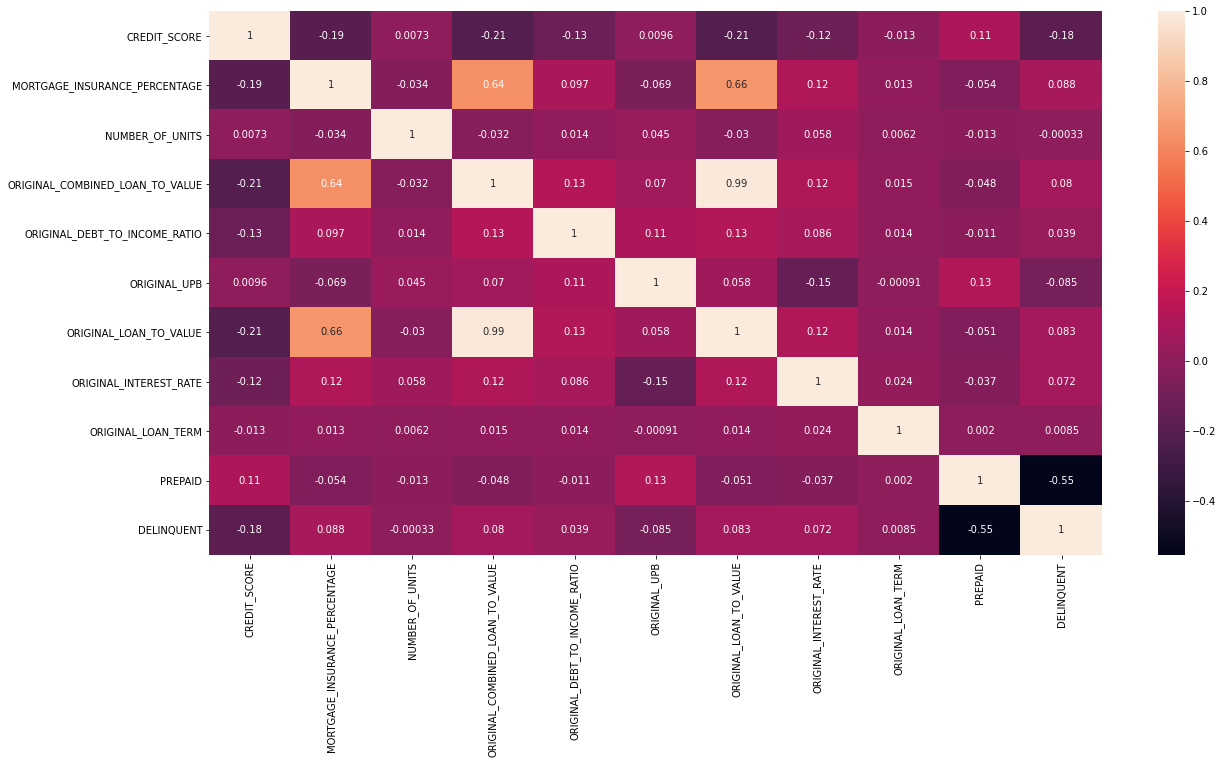

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot =True)
plt.show()

**Analysis**
* For the target variable(prepaid), the better correlated feature is Delinquent(-0.55).
* No other feature are much correlated. 

## Detecting Outliers

In [78]:
# defining a function that will create boxplot for all the continuous feature

def predict_outliers(cont_feature):
  for feature in cont_feature:
    sns.boxplot(y = df[feature])
    plt.ylabel(feature)
    plt.title(feature.title() + " " + "Distribution")
    plt.show()

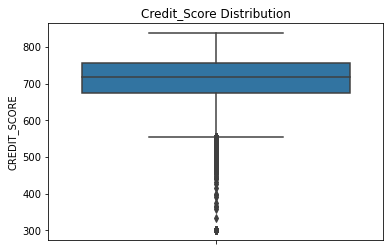

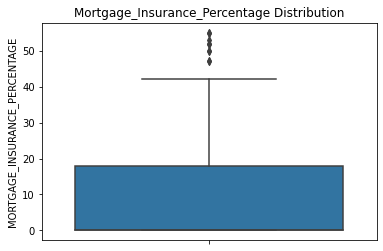

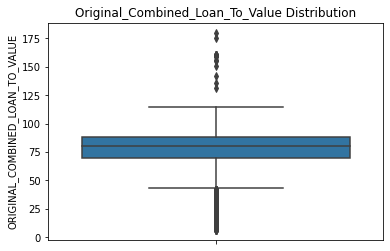

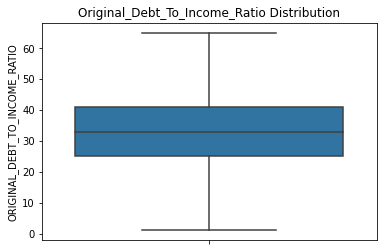

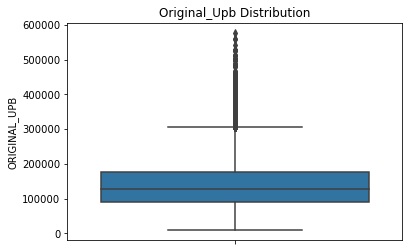

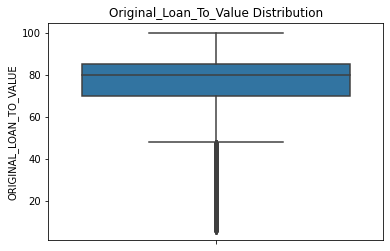

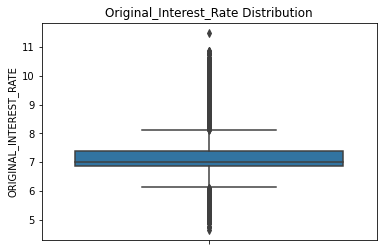

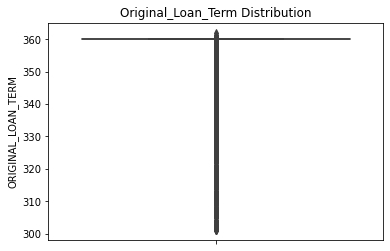

In [79]:
predict_outliers(continuous_feature)

**Analysis**

On the basis of above boxplot we can a lot of outliers value present 
* 'CREDIT_SCORE', 
* 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 
* 'ORIGINAL_UPB', 
* 'ORIGINAL_LOAN_TO_VALUE',
* 'ORIGINAL_INTEREST_RATE'
* 'ORIGINAL_LOAN_TERM'.

In future these outliers can significantly reduce the model's performance but sometimes they might be useful. Once afterbuilding the preliminary model we can remove the outliers to see if it improves the model performance or not.

## Data Preprocessing

In [81]:
#check null values
df.isnull().sum()

CREDIT_SCORE                         2711
FIRST_TIME_HOMEBUYER_FLAG          130559
MORTGAGE_INSURANCE_PERCENTAGE       51048
NUMBER_OF_UNITS                         3
ORIGINAL_COMBINED_LOAN_TO_VALUE        13
ORIGINAL_DEBT_TO_INCOME_RATIO       14929
ORIGINAL_UPB                            0
ORIGINAL_LOAN_TO_VALUE                  9
ORIGINAL_INTEREST_RATE                  0
ORIGINAL_LOAN_TERM                      0
PREPAID                                 0
DELINQUENT                              0
dtype: int64

In [82]:
#handling null values
df.dropna(inplace=True)

In [84]:
df.shape

(329567, 12)

In [85]:
df.isnull().sum()

CREDIT_SCORE                       0
FIRST_TIME_HOMEBUYER_FLAG          0
MORTGAGE_INSURANCE_PERCENTAGE      0
NUMBER_OF_UNITS                    0
ORIGINAL_COMBINED_LOAN_TO_VALUE    0
ORIGINAL_DEBT_TO_INCOME_RATIO      0
ORIGINAL_UPB                       0
ORIGINAL_LOAN_TO_VALUE             0
ORIGINAL_INTEREST_RATE             0
ORIGINAL_LOAN_TERM                 0
PREPAID                            0
DELINQUENT                         0
dtype: int64

In [87]:
#handling dulplicate rows
df.duplicated().sum()

325

In [89]:
df.drop_duplicates(inplace=True)

In [91]:
df.shape

(329242, 12)

In [92]:
df.head()

,CREDIT_SCORE,FIRST_TIME_HOMEBUYER_FLAG,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,ORIGINAL_LOAN_TERM,PREPAID,DELINQUENT
0,669.0,N,0.0,1.0,80.0,33.0,162000,80.0,7.120,320,True,False
1,732.0,N,0.0,1.0,25.0,10.0,53000,25.0,6.500,360,True,False
2,679.0,N,30.0,1.0,91.0,48.0,133000,91.0,6.750,319,True,False
3,721.0,N,0.0,1.0,39.0,13.0,174000,39.0,6.625,318,True,False
4,618.0,N,25.0,1.0,85.0,24.0,122000,85.0,6.375,317,True,False
